#### 1)Load the datasets.
#### 2)Split the dataset into initial labeled data and unlabeled data.
#### 3)Train a model on the initial labeled data.
#### 4)Select the most informative samples from the unlabeled data using different sampling strategies.
#### 5)Label the selected samples and add them to the labeled data.
#### 6)Retrain the model with the updated labeled data.
#### 7)Evaluate the model on a separate test set.
#### 8)Repeat steps 4-7 for a fixed number of iterations or until convergence.

In [4]:
pip install scikit-activeml

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.datasets import load_iris, load_digits,load_wine
from skactiveml.classifier import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from skactiveml.utils import MISSING_LABEL, labeled_indices, unlabeled_indices
from skactiveml.pool import UncertaintySampling,QueryByCommittee,RandomSampling
from sklearn.decomposition import PCA
from skactiveml.visualization import plot_utilities, plot_decision_boundary
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import warnings
import pandas as pd

In [7]:
# Load datasets
iris = load_iris()
X, y_true = iris.data, iris.target

# store the labels that we acquire from the oracle (y_true)
y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)

In [8]:
# Fit PCA to reduce dimensions to visualize.
pca = PCA(n_components=2)
X_pca  = pca.fit_transform(X)

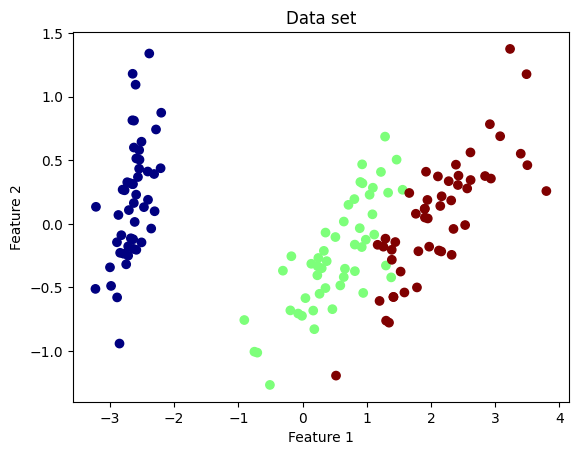

In [9]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='jet')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data set');

In [11]:
#As scikit-learn classifiers cannot cope with missing labels
#clf = RandomForestClassifier()
clf = SklearnClassifier(RandomForestClassifier(), classes=np.unique(y_true))

# Query Strategies
query_strategies = {
    'Random Sampling': RandomSampling(),
    'UC (Least Confidence)': UncertaintySampling(method='least_confident', random_state=42),
    'UC (Margin)': UncertaintySampling(method='margin_sampling', random_state=42),
    'Query By Committe':  QueryByCommittee(method='vote_entropy'),
    'Entropy': UncertaintySampling(method='entropy', random_state=42)
}
# bounding_box
bound = [[min(X_pca[:, 0]), min(X_pca[:, 1])], [max(X_pca[:, 0]), max(X_pca[:, 1])]]
accuracy_results = {strategy_name: [] for strategy_name in query_strategies}
# Number of cycles
n_cycles = 20

# Iterate over query strategies
for strategy_name, qs in query_strategies.items():
    # Initialize labeled data
    y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)
    clf.fit(X_pca , y)
    
    accuracy_list = []
    # Active learning cycle
    for c in range(n_cycles):
        # Query
        if qs == query_strategies['Query By Committe']:
            query_idx = qs.query(X=X_pca, y=y, ensemble=clf, batch_size=1)
        elif qs == query_strategies['Random Sampling']:
            query_idx = qs.query(X=X_pca, y=y, batch_size=1)
        else:
            query_idx = qs.query(X=X_pca, y=y, clf=clf, batch_size=1)

        # Label acquired samples
        y[query_idx] = y_true[query_idx]
        
        # Retrain classifier
        clf.fit(X_pca , y)
        
        # Calculate accuracy
        accuracy = clf.score(X_pca, y_true)
        
        accuracy_list.append(accuracy)
        
        # Print results
        print(f'Query Strategy: {strategy_name}, Iteration: {c+1}, Accuracy: {accuracy:.2f}')
        
        unlbld_idx = unlabeled_indices(y)
        lbld_idx = labeled_indices(y)
    
    accuracy_results[strategy_name] = accuracy_list

Query Strategy: Random Sampling, Iteration: 1, Accuracy: 0.33
Query Strategy: Random Sampling, Iteration: 2, Accuracy: 0.49
Query Strategy: Random Sampling, Iteration: 3, Accuracy: 0.66
Query Strategy: Random Sampling, Iteration: 4, Accuracy: 0.43
Query Strategy: Random Sampling, Iteration: 5, Accuracy: 0.67
Query Strategy: Random Sampling, Iteration: 6, Accuracy: 0.73
Query Strategy: Random Sampling, Iteration: 7, Accuracy: 0.83
Query Strategy: Random Sampling, Iteration: 8, Accuracy: 0.75
Query Strategy: Random Sampling, Iteration: 9, Accuracy: 0.73
Query Strategy: Random Sampling, Iteration: 10, Accuracy: 0.87
Query Strategy: Random Sampling, Iteration: 11, Accuracy: 0.90
Query Strategy: Random Sampling, Iteration: 12, Accuracy: 0.88
Query Strategy: Random Sampling, Iteration: 13, Accuracy: 0.71
Query Strategy: Random Sampling, Iteration: 14, Accuracy: 0.91
Query Strategy: Random Sampling, Iteration: 15, Accuracy: 0.93
Query Strategy: Random Sampling, Iteration: 16, Accuracy: 0.87
Q

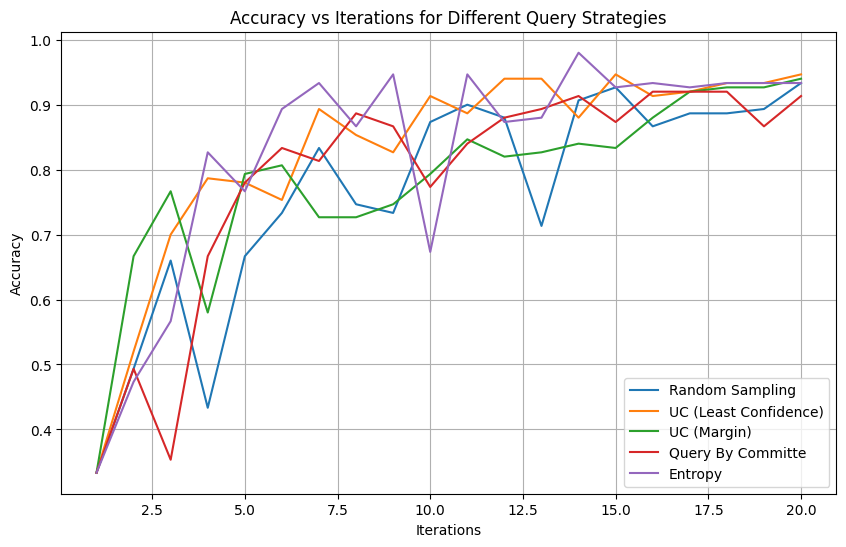

In [12]:
plt.figure(figsize=(10, 6))
for strategy_name, accuracy_list in accuracy_results.items():
    plt.plot(range(1, n_cycles + 1), accuracy_list, label=strategy_name)

plt.title('Accuracy vs Iterations for Different Query Strategies')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Second data

In [13]:
digits = load_digits()
X2 = digits.data/255.0 
y_true2 = digits.target

In [14]:
clf = SklearnClassifier(RandomForestClassifier(), classes=np.unique(y_true))

# Query Strategies
query_strategies = {
    'Random Sampling': RandomSampling(),
    'UC (Least Confidence)': UncertaintySampling(method='least_confident', random_state=42),
    'UC (Margin)': UncertaintySampling(method='margin_sampling', random_state=42),
    'Query By Committe':  QueryByCommittee(method='vote_entropy'),
    'Entropy': UncertaintySampling(method='entropy', random_state=42)
}
# bounding_box
bound = [[min(X_pca[:, 0]), min(X_pca[:, 1])], [max(X_pca[:, 0]), max(X_pca[:, 1])]]
accuracy_results = {strategy_name: [] for strategy_name in query_strategies}
# Number of cycles
n_cycles = 20

# Iterate over query strategies
for strategy_name, qs in query_strategies.items():
    # Initialize labeled data
    y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)
    clf.fit(X_pca , y)
    
    accuracy_list = []
    # Active learning cycle
    for c in range(n_cycles):
        # Query
        if qs == query_strategies['Query By Committe']:
            query_idx = qs.query(X=X_pca, y=y, ensemble=clf, batch_size=1)
        elif qs == query_strategies['Random Sampling']:
            query_idx = qs.query(X=X_pca, y=y, batch_size=1)
        else:
            query_idx = qs.query(X=X_pca, y=y, clf=clf, batch_size=1)

        # Label acquired samples
        y[query_idx] = y_true[query_idx]
        
        # Retrain classifier
        clf.fit(X_pca , y)
        
        # Calculate accuracy
        accuracy = clf.score(X_pca, y_true)
        
        accuracy_list.append(accuracy)
        
        # Print results
        print(f'Query Strategy: {strategy_name}, Iteration: {c+1}, Accuracy: {accuracy:.2f}')
        
        unlbld_idx = unlabeled_indices(y)
        lbld_idx = labeled_indices(y)
    
    accuracy_results[strategy_name] = accuracy_list

Query Strategy: Random Sampling, Iteration: 1, Accuracy: 0.33
Query Strategy: Random Sampling, Iteration: 2, Accuracy: 0.55
Query Strategy: Random Sampling, Iteration: 3, Accuracy: 0.53
Query Strategy: Random Sampling, Iteration: 4, Accuracy: 0.49
Query Strategy: Random Sampling, Iteration: 5, Accuracy: 0.47
Query Strategy: Random Sampling, Iteration: 6, Accuracy: 0.49
Query Strategy: Random Sampling, Iteration: 7, Accuracy: 0.48
Query Strategy: Random Sampling, Iteration: 8, Accuracy: 0.49
Query Strategy: Random Sampling, Iteration: 9, Accuracy: 0.47
Query Strategy: Random Sampling, Iteration: 10, Accuracy: 0.92
Query Strategy: Random Sampling, Iteration: 11, Accuracy: 0.87
Query Strategy: Random Sampling, Iteration: 12, Accuracy: 0.87
Query Strategy: Random Sampling, Iteration: 13, Accuracy: 0.93
Query Strategy: Random Sampling, Iteration: 14, Accuracy: 0.90
Query Strategy: Random Sampling, Iteration: 15, Accuracy: 0.87
Query Strategy: Random Sampling, Iteration: 16, Accuracy: 0.93
Q

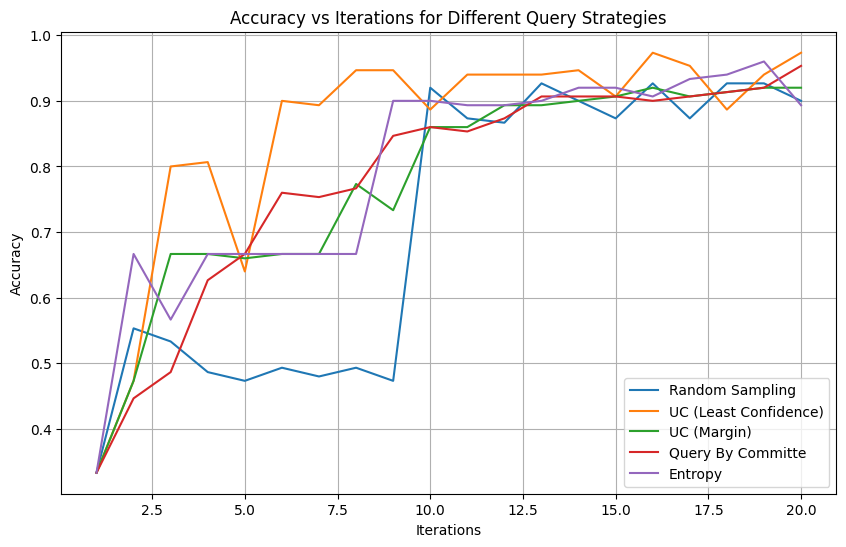

In [15]:
plt.figure(figsize=(10, 6))
for strategy_name, accuracy_list in accuracy_results.items():
    plt.plot(range(1, n_cycles + 1), accuracy_list, label=strategy_name)

plt.title('Accuracy vs Iterations for Different Query Strategies')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()